In [1]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

theta = sym.symbols('theta')

# Material properties
E_L = 200 #GPa
E_L = 200e9 #Pa
E_T = 40 #GPa
E_T = 40e9 #Pa
nu_LT = 0.2
# nu_TL = E_T/E_L*nu_LT
nu_TL = E_T/E_L*nu_LT
G_LT = 30 #GPa
G_LT = 30e9 #Pa
t = 0.1 #mm
t = 0.1e-3 #m
angle_list = [0, theta, -theta]
repetitions = 1
symmetry = True
N_x = -100_000 # [N/m]
N_y = -200_000 # [N/m]
N_xy = 0 # [N/m]


In [161]:
import sympy as sym
# Q matrix
Q = sym.Matrix([[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
     [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
     [0, 0, G_LT]])
display(Q/1e9)
T_sigma = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                   [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                   [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])
T_epsilon = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, sym.cos(theta)*sym.sin(theta)],
                     [sym.sin(theta)**2, sym.cos(theta)**2, -sym.cos(theta)*sym.sin(theta)],
                     [-2*sym.cos(theta)*sym.sin(theta), 2*sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])

Q_list = []
def Q_bar():
    Q_bar = (T_sigma.inv()) * Q * T_epsilon
    for i in angle_list:
        Q_list.append(Q_bar.subs(theta, i))
    return Q_list

Q_list = Q_bar()
A = sym.Matrix.zeros(3,3)
for i in range(len(Q_list)):
    A += 2*t*Q_list[i]

A_inv = A.inv()

Matrix([
[201.612903225806, 8.06451612903226,    0],
[8.06451612903226, 40.3225806451613,    0],
[               0,                0, 30.0]])

In [162]:
N_matrix = sym.Matrix([[N_x, N_y, 0]])
epsilon_matrix = A_inv * N_matrix.T
display(epsilon_matrix)

Matrix([
[-200000*(-273152965660770.0*sin(theta)**40 - 7.95962539021853e+15*sin(theta)**38*cos(theta)**2 - 9.80887159209157e+16*sin(theta)**36*cos(theta)**4 - 7.16747238293445e+17*sin(theta)**34*cos(theta)**6 - 3.5647891987513e+18*sin(theta)**32*cos(theta)**8 - 1.29828505306972e+19*sin(theta)**30*cos(theta)**10 - 3.61718205202914e+19*sin(theta)**28*cos(theta)**12 - 7.92680855442248e+19*sin(theta)**26*cos(theta)**14 - 1.3910360775026e+20*sin(theta)**24*cos(theta)**16 - 1.97669375900104e+20*sin(theta)**22*cos(theta)**18 - 2.28835272341311e+20*sin(theta)**20*cos(theta)**20 - 2.16188302018731e+20*sin(theta)**18*cos(theta)**22 - 1.66278558842872e+20*sin(theta)**16*cos(theta)**24 - 1.03424289498439e+20*sin(theta)**14*cos(theta)**26 - 5.14094812903226e+19*sin(theta)**12*cos(theta)**28 - 2.0044661144641e+19*sin(theta)**10*cos(theta)**30 - 5.95766745057232e+18*sin(theta)**8*cos(theta)**32 - 1.29079094276795e+18*sin(theta)**6*cos(theta)**34 - 1.89227113423517e+17*sin(theta)**4*cos(theta)**36 - 1

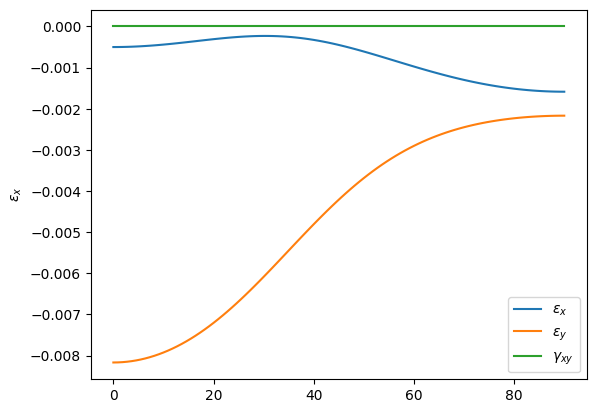

In [163]:
# Lambdify the expression
epsilon_func_0 = sym.lambdify(theta, epsilon_matrix[0], modules=['numpy'])
epsilon_func_1 = sym.lambdify(theta, epsilon_matrix[1], modules=['numpy'])
epsilon_func_2 = sym.lambdify(theta, epsilon_matrix[2], modules=['numpy'])

# Create a range of theta
theta_range = np.linspace(0, np.pi/2, 100)

eps_2 = [epsilon_func_2(theta) for theta in theta_range]
# Calculate the epsilon
# Plot the results
plt.plot(np.degrees(theta_range), epsilon_func_0(theta_range), label=r'$\epsilon_x$')
plt.plot(np.degrees(theta_range), epsilon_func_1(theta_range), label=r'$\epsilon_y$')
plt.plot(np.degrees(theta_range), eps_2, label=r'$\gamma_{xy}$')
plt.ylabel(r'$\epsilon_x$')
plt.legend()
plt.show()

#### Since we have a symmetric plate, there will be no shear strain. When the angle of the ply gets more aligned with the greatest force the stress will decrease as the plate is more resistant and the stress is more even in between the two directions. When the angle is perpendicular to the force, the plate will experience the greatest stress.

#### A good initial value for the angle is above 50 degrees, this should decrease $\epsilon_y$ enough to not cause a failure

# <center> C <center>

In [187]:
X_t = 600e6
X_c = -800e6
Y_t = 100e6
Y_c = -200e6
S = 200e6

# Q matrix
Q = [[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
     [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
     [0, 0, G_LT]]

T_sigma = lambda theta: [[np.cos(theta)**2, np.sin(theta)**2, 2*np.cos(theta)*np.sin(theta)],
                   [np.sin(theta)**2, np.cos(theta)**2, -2*np.cos(theta)*np.sin(theta)],
                   [-np.cos(theta)*np.sin(theta), np.cos(theta)*np.sin(theta), np.cos(theta)**2-np.sin(theta)**2]]
T_epsilon = lambda theta: [[np.cos(theta)**2, np.sin(theta)**2, np.cos(theta)*np.sin(theta)],
                     [np.sin(theta)**2, np.cos(theta)**2, -np.cos(theta)*np.sin(theta)],
                     [-2*np.cos(theta)*np.sin(theta), 2*np.cos(theta)*np.sin(theta), np.cos(theta)**2-np.sin(theta)**2]]

Q_bar = lambda theta: np.dot(np.dot(np.linalg.inv(T_sigma(theta)), Q), T_epsilon(theta))

angle_list = [0, 40, -40]
# Convert to radians
angle_list = [angle*np.pi/180 for angle in angle_list]
Q_list = []
for angle in angle_list:
    Q_list.append(Q_bar(angle))

Q = sym.Matrix(Q)
A = 2*t*(sum(Q_list))
A_inv = np.linalg.inv(A)
eps_naught = sym.Matrix(np.dot(A_inv, [N_x, N_y, 0]))
def Tsai_eps():
    T_eps = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])
    return T_eps

def Tsai_hill(sigma_x, sigma_y, tau_xy):
    value = sigma_x**2/(X_c**2) - sigma_x*sigma_y/(X_c**2) + sigma_y**2/(Y_c**2) + tau_xy**2/(S**2)
    return value

T_eps = Tsai_eps()
def Tsai_hill_criterion(angle_list):
    for angle in angle_list:
        epsilon_theta = A_inv*sym.Matrix([N_x, N_y, N_xy])
        T_eps_theta = T_eps.subs(theta, angle)
        sigma_theta = Q*(T_eps_theta*epsilon_theta)
        sigma_x, sigma_y, tau_xy = sigma_theta
        Tsai_hill_value = Tsai_hill(sigma_x, sigma_y, tau_xy)
        if Tsai_hill_value > 1:
            print(f'Angle {np.rad2deg(angle)} is not safe')
        else:
            print(f'No failure at angle {np.rad2deg(angle)}')

Tsai_hill_criterion(angle_list)

No failure at angle 0.0
No failure at angle 40.0
No failure at angle -40.0


In [6]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

theta = sym.symbols('theta')

# Material properties
E_L = 400 #GPa
E_L = 400e9 #Pa
E_T = 50 #GPa
E_T = 50e9 #Pa
nu_LT = 0.1
# nu_TL = E_T/E_L*nu_LT
nu_TL = E_T/E_L*nu_LT
G_LT = 40 #GPa
G_LT = 40e9 #Pa
t = 0.1 #mm
t = 0.1e-3 #m
repetitions = 1
symmetry = True
N_x = 0 # [N/m]
N_y = 0 # [N/m]
N_xy = 10_000 # [N/m]

X_t = 700e6
X_c = -800e6
Y_t = 150e6
Y_c = -300e6
S = 150e6

# Q matrix
Q = [[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
     [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
     [0, 0, G_LT]]

T_sigma = lambda theta: [[np.cos(theta)**2, np.sin(theta)**2, 2*np.cos(theta)*np.sin(theta)],
                   [np.sin(theta)**2, np.cos(theta)**2, -2*np.cos(theta)*np.sin(theta)],
                   [-np.cos(theta)*np.sin(theta), np.cos(theta)*np.sin(theta), np.cos(theta)**2-np.sin(theta)**2]]
T_epsilon = lambda theta: [[np.cos(theta)**2, np.sin(theta)**2, np.cos(theta)*np.sin(theta)],
                     [np.sin(theta)**2, np.cos(theta)**2, -np.cos(theta)*np.sin(theta)],
                     [-2*np.cos(theta)*np.sin(theta), 2*np.cos(theta)*np.sin(theta), np.cos(theta)**2-np.sin(theta)**2]]

Q_bar = lambda theta: np.dot(np.dot(np.linalg.inv(T_sigma(theta)), Q), T_epsilon(theta))

angle_list = [0, 40, -40]

# Convert to radians
angle_list = [angle*np.pi/180 for angle in angle_list]
Q_list = []
for angle in angle_list:
    Q_list.append(Q_bar(angle))

Q = sym.Matrix(Q)
A = 2*t*(sum(Q_list))
A_inv = np.linalg.inv(A)
eps_naught = sym.Matrix(np.dot(A_inv, [N_x, N_y, N_xy]))
def Tsai_eps():
    T_eps = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])
    return T_eps

def Tsai_hill(sigma_x, sigma_y, tau_xy):
    value = sigma_x**2/(X_c**2) - sigma_x*sigma_y/(X_c**2) + sigma_y**2/(Y_c**2) + tau_xy**2/(S**2)
    return value

T_eps = Tsai_eps()
def Tsai_hill_criterion(angle_list):
    for angle in angle_list:
        epsilon_theta = A_inv*sym.Matrix([N_x, N_y, N_xy])
        T_eps_theta = T_eps.subs(theta, angle)
        sigma_theta = Q*(T_eps_theta*epsilon_theta)
        sigma_x, sigma_y, tau_xy = sigma_theta
        Tsai_hill_value = Tsai_hill(sigma_x, sigma_y, tau_xy)
        print('{:.2f}'.format(Tsai_hill_value))
        if Tsai_hill_value > 1:
            print(f'Angle {np.rad2deg(angle)} is not safe')
        else:
            print(f'No failure at angle {np.rad2deg(angle)}')

Tsai_hill_criterion(angle_list)

0.00
No failure at angle 0.0
0.01
No failure at angle 40.0
0.01
No failure at angle -40.0
